<a href="https://colab.research.google.com/github/Saul-Ochoa/Time-Series/blob/main/Banco%20Central%20de%20Reservas/Scrapping_BCRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web scrapping Banco Central de Reservas del Perú

In [21]:
pip install mplcyberpunk

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from io import StringIO
# Una mejor vizualización de los datos
import mplcyberpunk
plt.style.use("cyberpunk")
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

**Funcion Web BCRP**

In [2]:
def webscr_bcrp(codigo,start,end):
    url="https://estadisticas.bcrp.gob.pe/estadisticas/series/api/"+codigo+"/"+"csv/"+start+"/"+end
    content = requests.get(url,verify=False).text.replace("<br>","\n").strip()
    csv =  StringIO(content)
    r = pd.read_csv(csv)
    return(r)

In [3]:
bcrp=webscr_bcrp(codigo="PN01770AM",start="2003-1",end="2023-04")
bcrp.head()

,Mes/A&ntilde;o,Producto bruto interno y demanda interna (&iacute;ndice 2007=100) - PBI
0,Ene.2003,73.222370
1,Feb.2003,71.079432
2,Mar.2003,74.342723
3,Abr.2003,80.667712
4,May.2003,83.222646


In [8]:
bcrp=bcrp.rename(columns={'Producto bruto interno y demanda interna (&iacute;ndice 2007=100) - PBI':'PBI','Mes/A&ntilde;o':'Mes'})
bcrp.head()

,Mes,PBI
0,Ene.2003,73.222370
1,Feb.2003,71.079432
2,Mar.2003,74.342723
3,Abr.2003,80.667712
4,May.2003,83.222646


In [9]:
bcrp.sample(10)

,Mes,PBI
1,Feb.2003,71.079432
40,May.2006,97.761906
188,Sep.2018,168.105837
49,Feb.2007,88.668102
232,May.2022,179.981667
203,Dic.2019,189.600038
72,Ene.2009,102.953128
180,Ene.2018,154.598248
143,Dic.2014,159.976450
186,Jul.2018,166.518728


In [12]:
# Mapear los nombres de los meses en español a los nombres de los meses en inglés
meses_dict = {'Ene.': 'Jan', 'Feb.': 'Feb', 'Mar.': 'Mar', 'Abr.': 'Apr', 'May.': 'May', 'Jun.': 'Jun', 'Jul.': 'Jul', 'Ago.': 'Aug', 'Sep.': 'Sep', 'Oct.': 'Oct', 'Nov.': 'Nov', 'Dic.': 'Dec'}

In [13]:
# Convertir la columna "Mes" a formato fecha
bcrp['Mes'] = pd.to_datetime(bcrp['Mes'].replace(meses_dict, regex=True), format='%b%Y')
# Imprimir el DataFrame con la columna "Mes" en formato fecha
bcrp.head()

,Mes,PBI
0,2003-01-01,73.222370
1,2003-02-01,71.079432
2,2003-03-01,74.342723
3,2003-04-01,80.667712
4,2003-05-01,83.222646


In [14]:
bcrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Mes     244 non-null    datetime64[ns]
 1   PBI     244 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [15]:
bcrp=bcrp.set_index('Mes')
bcrp.head()

,PBI
Mes,
2003-01-01,73.222370
2003-02-01,71.079432
2003-03-01,74.342723
2003-04-01,80.667712
2003-05-01,83.222646


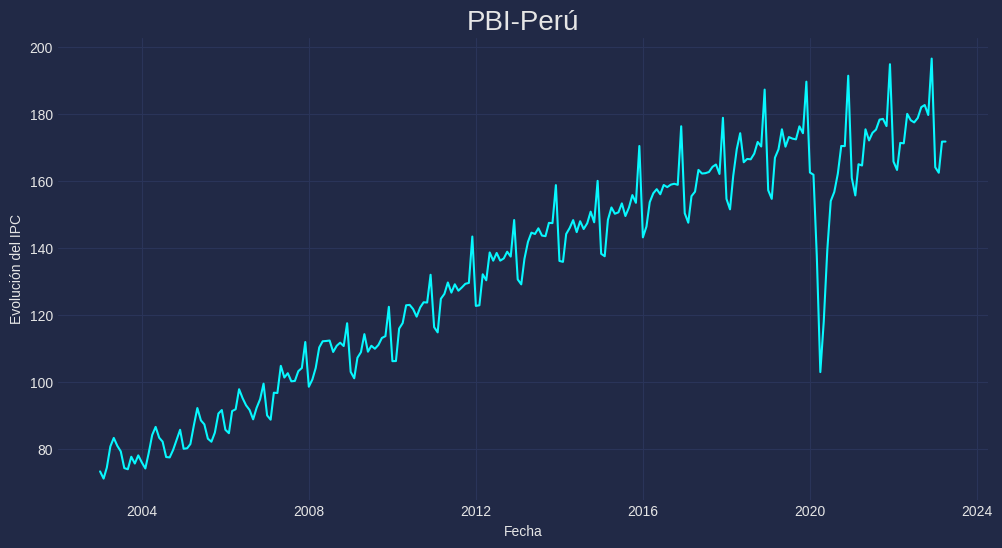

In [23]:
plt.figure(figsize=(12,6))
sns.lineplot(data=bcrp,x=bcrp.index,y=bcrp['PBI'])
plt.title('PBI-Perú',fontsize=20)
plt.xlabel("Fecha")
plt.ylabel("Evolución del IPC")
plt.show()

In [27]:
fig=px.line(bcrp,x=bcrp.index,y='PBI',title='PBI-PERU',template='plotly_dark')
fig.show()